<a href="https://colab.research.google.com/github/m-dwaipayan/CDB22DW022-Dwaipayan/blob/main/Python_visualization_with_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUALIZATION: EXPLORATORY DATA ANALYSIS**

USING PANDAS TO PLOT

In [1]:
import pandas as pd
ti = pd.read_csv('titanic.csv')

In [2]:
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


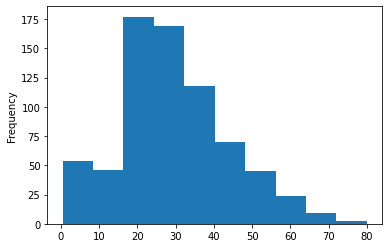

In [3]:
ti['age'].plot(kind='hist')

USING SEABORN TO VISUALIZE DATA

In [7]:
import seaborn as sns

Checking for null values and cleaning data

In [8]:
ti.isna().sum() # checking for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

So we see that there are 177 NaNs in age and 688 NaNs in deck

In [9]:
# Replacing NaNs in numerical fields with the mean values
ti = ti.fillna(ti.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [10]:
ti.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# Filling every column with its own most frequent value
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
ti.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

All missing values are taken care of.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


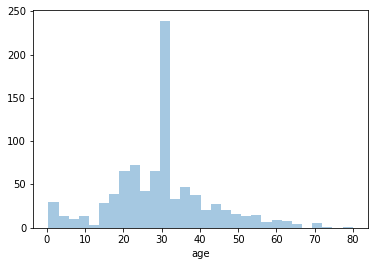

In [13]:
sns.distplot(ti['age'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


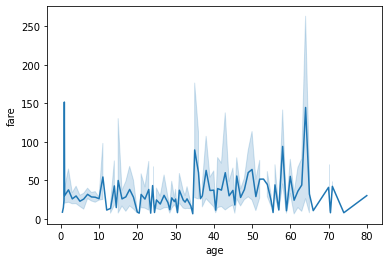

In [14]:
sns.lineplot(ti['age'],ti['fare'])

Using dataframe with seaborn

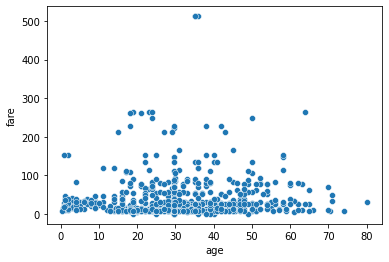

In [15]:
sns.scatterplot(data=ti,x='age',y='fare')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


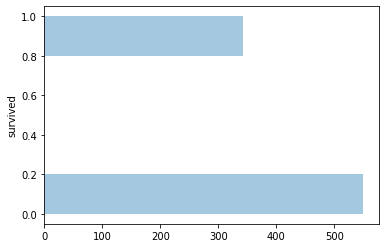

In [16]:
sns.distplot(ti['survived'],vertical=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


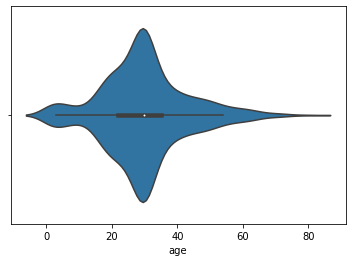

In [17]:
# Violin plot
sns.violinplot(ti['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


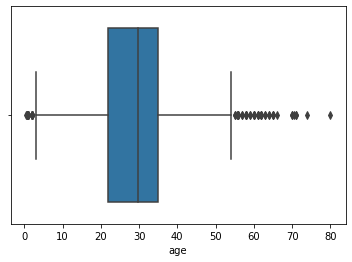

In [18]:
# Box plot
sns.boxplot(ti['age'])

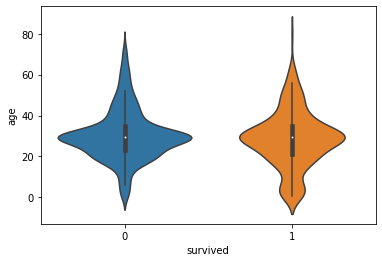

In [19]:
# Violin plot with multiple columns
sns.violinplot(data=ti,x='survived',y='age')

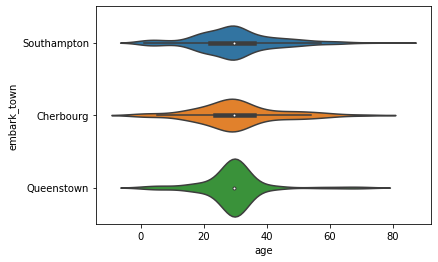

In [20]:
sns.violinplot(data=ti,x='age',y='embark_town')

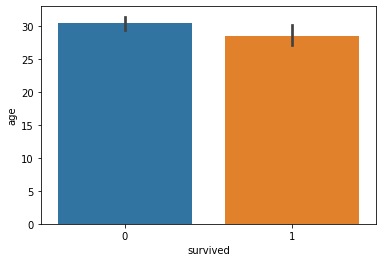

In [21]:
# Barplot for multiple columns
sns.barplot(data=ti,x='survived',y='age')

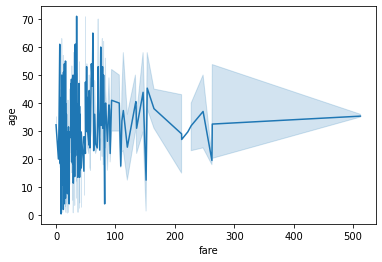

In [22]:
# Line plot using seaborn
sns.lineplot(data=ti,x='fare',y='age')

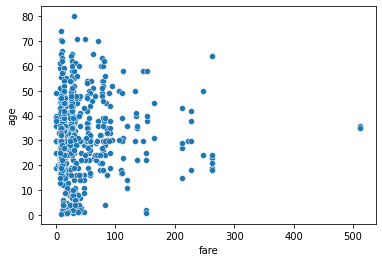

In [23]:
# Scatter plot 
sns.scatterplot(data=ti,x='fare',y='age')

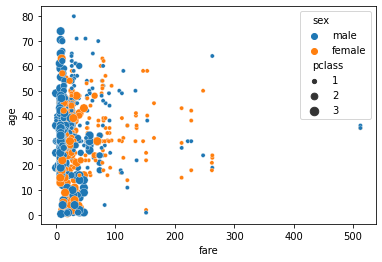

In [24]:
sns.scatterplot(data = ti,x='fare',y='age',hue='sex',size='pclass')

**EXERCISE**

STEP 1

In [25]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


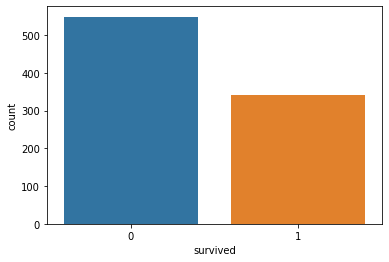

In [26]:
sns.countplot(data=ti,x='survived')

This shows that survival rate is less than the deceased rate.

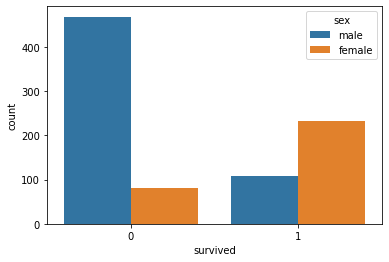

In [27]:
sns.countplot(data=ti,x='survived',hue='sex')

This shows that of the people survived, females are twice more likely than males, and of the deceased, males are manyfolds more likely to have died than females.

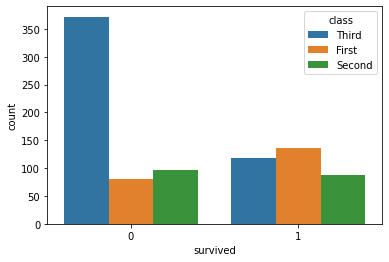

In [29]:
sns.countplot(data=ti,x='survived',hue='class')

This shows that the most likely to have died were the third class passengers rather than the first class ones.

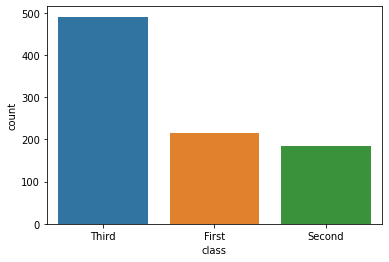

In [30]:
sns.countplot(data=ti,x='class')

The previous result is corroborated by the fact that the passengers consisted of more third class passengers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


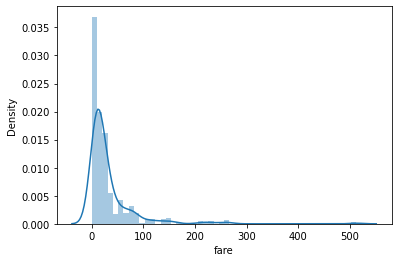

In [32]:
sns.distplot(ti['fare'])

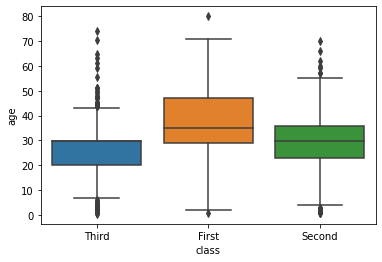

In [33]:
sns.boxplot(data=ti,x='class',y='age')

This gives the age distribution according to the class.

STEP 2 : What affected your chances of survival on the titanic?

In [34]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


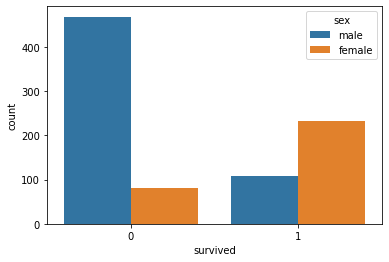

In [35]:
sns.countplot(data=ti,x='survived',hue='sex')

If I am a female, I have more chance to survive.

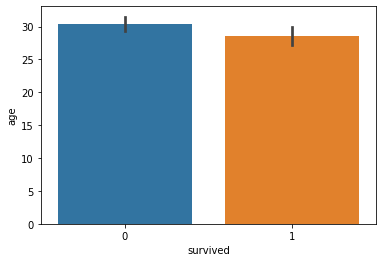

In [40]:
sns.barplot(data=ti,y='age',x='survived')

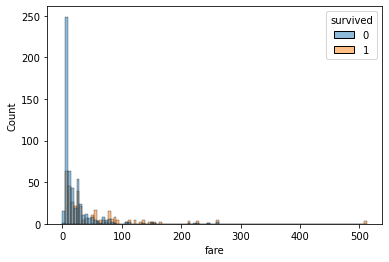

In [45]:
sns.histplot(data=ti,x='fare',hue='survived')

If I bought an expensive ticket, it is more likely that I can survive.

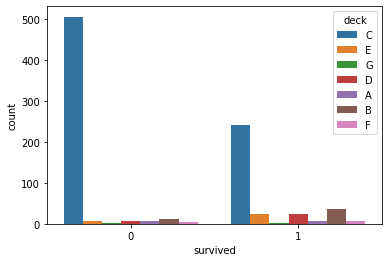

In [46]:
sns.countplot(data=ti,x='survived',hue='deck')

I am less likely to survive if my deck is C.

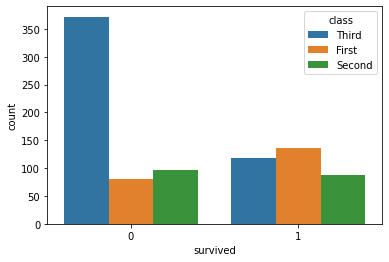

In [47]:
sns.countplot(data=ti,x='survived',hue='class')

It is most likely that I can survive if I am a first class passenger. However, if I am a third class passenger, it is most likely that I would die.

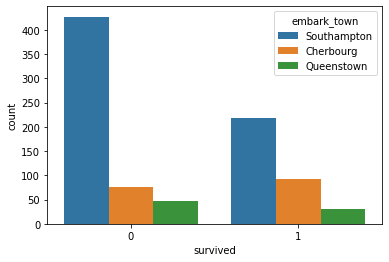

In [48]:
sns.countplot(data=ti,x='survived',hue='embark_town')

There is no such pattern of death or survival based on from where I have boarded the ship.

FOLLOWING THE GIVEN INSTRUCTIONS:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


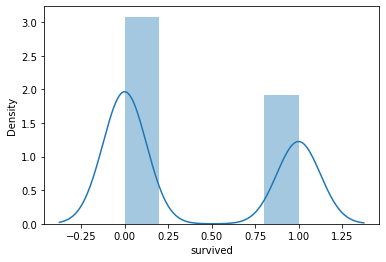

In [49]:
sns.distplot(ti['survived'])

Since survived column has only two values 0 and 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


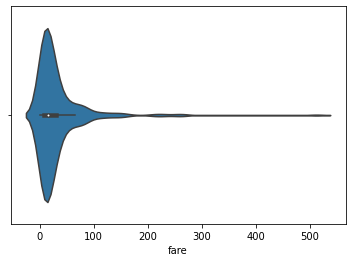

In [50]:
sns.violinplot(ti['fare'])

Fares are gravitating between 0 and $50.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


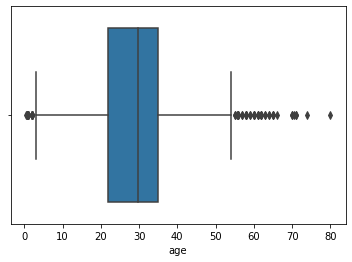

In [51]:
sns.boxplot(ti['age'])

The mean age of people who boarded titanic was nearly 30.

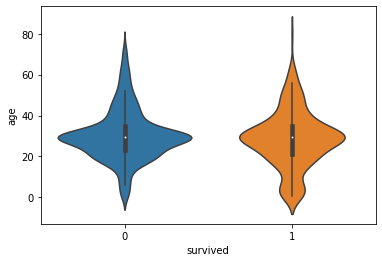

In [53]:
sns.violinplot(data=ti,y='age',x='survived')

Since the frequency of age of people deceased and survived is nearly same. However, the violin plot for the survived is more stretched towards the older age, meaning is I were old, I would have a better chance at survival.

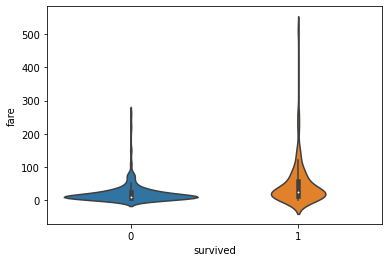

In [54]:
sns.violinplot(data=ti,x='survived',y='fare')

If the fare of my ticket was more, I had a better chance of survival.

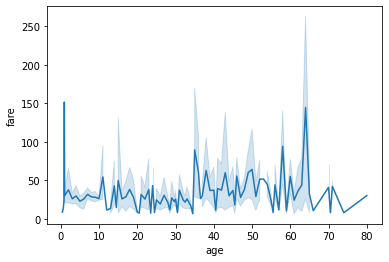

In [55]:
sns.lineplot(data=ti,x='age',y='fare')

Older people tend to buy more expensive tickets rather than people near to the mean age group of 25 to 35.

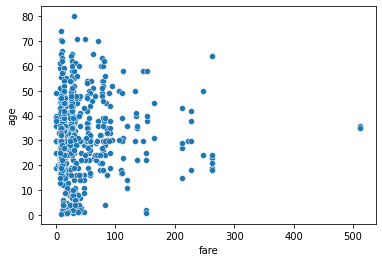

In [56]:
sns.scatterplot(data=ti,x='fare',y='age')

In [58]:
ti[['age','sex']].groupby(ti.age>18).sum() #group by

,age
age,
False,1489.670000
True,24972.243824
